# 6.5: Unsupervised Machine Learning: Clustering

# Contents

### 01. Importing libraries and data
### 02. The elbow technique
### 03. k-means clustering

## 01. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\Sulo\Desktop\Careerfoundry\Immersion\Achievement 6'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data',  'Prepared Data', 'immo_v3.csv'), index_col = 0)

In [5]:
df.shape

(79386, 26)

In [6]:
df.head()

,state,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,cellar,baseRent,...,noRooms,floor,garden,city/district,neighbourhood,year,pricepm2,additionalcost,buildingAge,Rent price category
0,Nordrhein-Westfalen,245.0,central_heating,True,True,840.0,1965.0,True,True,595,...,4,1.0,True,Dortmund,Schüren,01.05.2019,6.918605,245.0,58.0,Low rent
1,Sachsen,70.0,self_contained_central_heating,True,True,380.0,1958.0,True,True,310,...,2,1.0,True,Mittelsachsen_Kreis,Freiberg,01.02.2020,5.000000,70.0,65.0,Low rent
2,Baden-Württemberg,110.0,oil_heating,True,True,690.0,1970.0,True,True,580,...,2,2.0,True,Emmendingen_Kreis,Denzlingen,01.02.2020,10.943396,110.0,53.0,Low rent
3,Sachsen,88.0,central_heating,True,True,307.0,1930.0,True,True,219,...,2,3.0,True,Chemnitz,Sonnenberg,01.10.2019,0.544776,88.0,93.0,Low rent
4,Schleswig-Holstein,140.0,central_heating,True,True,1450.0,1978.0,True,True,1150,...,4,0.0,True,Neumünster,Wittorf,01.10.2019,7.187500,300.0,45.0,Middle rent


## 02. The elbow technique

In [7]:
df.columns

Index(['state', 'serviceCharge', 'heatingType', 'newlyConst', 'balcony',
       'totalRent', 'yearConstructed', 'hasKitchen', 'cellar', 'baseRent',
       'livingSpace', 'condition', 'petsAllowed', 'lift', 'baseRentRange',
       'typeOfFlat', 'noRooms', 'floor', 'garden', 'city/district',
       'neighbourhood', 'year', 'pricepm2', 'additionalcost', 'buildingAge',
       'Rent price category'],
      dtype='object')

In [8]:
# Create a subset with quantitative data
sub = df[['serviceCharge','totalRent', 'yearConstructed', 'baseRent','livingSpace', 'baseRentRange','noRooms', 'floor', 'pricepm2', 'additionalcost']]

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\Sulo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sulo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sulo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sulo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

[-34887526755.583405,
 -13825722233.826578,
 -7990758470.498635,
 -5199825721.310699,
 -3884037440.9352813,
 -3106414240.2021284,
 -2593524217.910005,
 -2214160232.6310697,
 -1914155808.409731]

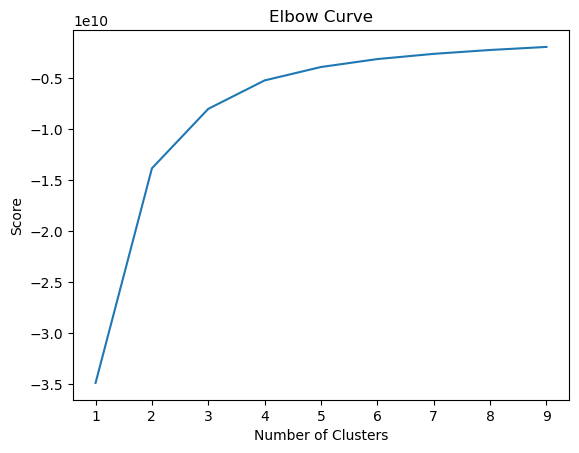

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### I can't really make it out but it looks like 4 clusters to me, if it's not that I will try with 3 clusters if I ge weird results

## 03. k-means clustering

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [13]:
# Fit the k-means object to the data.

kmeans.fit(sub)

C:\Users\Sulo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [14]:
sub['clusters'] = kmeans.fit_predict(sub)

C:\Users\Sulo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sulo\AppData\Local\Temp\ipykernel_11612\3683309691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [15]:
sub.head()

,serviceCharge,totalRent,yearConstructed,baseRent,livingSpace,baseRentRange,noRooms,floor,pricepm2,additionalcost,clusters
0,245.0,840.0,1965.0,595,86,4,4,1.0,6.918605,245.0,1
1,70.0,380.0,1958.0,310,62,2,2,1.0,5.000000,70.0,1
2,110.0,690.0,1970.0,580,53,4,2,2.0,10.943396,110.0,1
3,88.0,307.0,1930.0,219,402,1,2,3.0,0.544776,88.0,1
4,140.0,1450.0,1978.0,1150,160,7,4,0.0,7.187500,300.0,0


In [16]:
sub['clusters'].value_counts()

clusters
1    49800
0    24244
2     5342
Name: count, dtype: int64

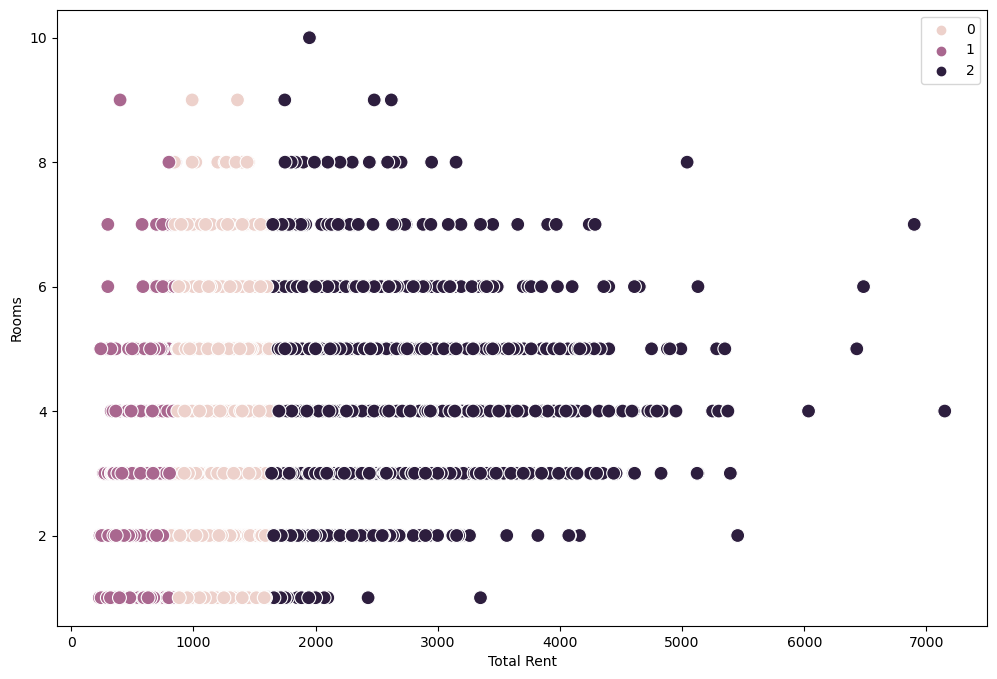

In [17]:
# Plot the clusters for the "totalRent" and "noRooms" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['totalRent'], y=df['noRooms'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total Rent') # Label x-axis.
plt.ylabel('Rooms') # Label y-axis.
plt.show()

#### In general the dark purple color is related to the most expensive rents and we see in general that more rooms equals to more rent. Pink is all over mostly from 800-1800 and the rooms are all represented. Purple is the cheapest and the number of rooms available are less in common

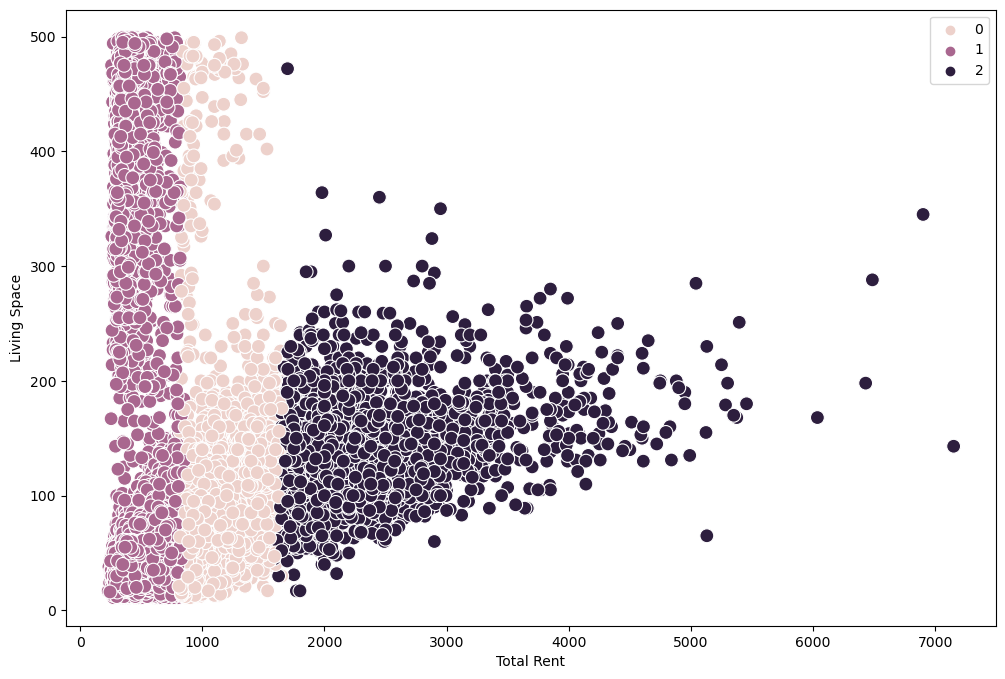

In [19]:
# Plot the clusters for the "Total Rent" and "Living Space" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['totalRent'], y=df['livingSpace'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Total Rent') 
plt.ylabel('Living Space') 
plt.show()

#### Dark purple show that the higher the rent is the less living space is available, which would lead me to believe that the neighbourhood is good, or they rent a house, or just live in better places, this I can't prove yet. Pink shows the middle range of rent are distrubuted until 250 sqm and then only appear frequent again at 400 sqm +. Purple is showed all accross living spaces and the high amount of sqm are probably a room in a big place.

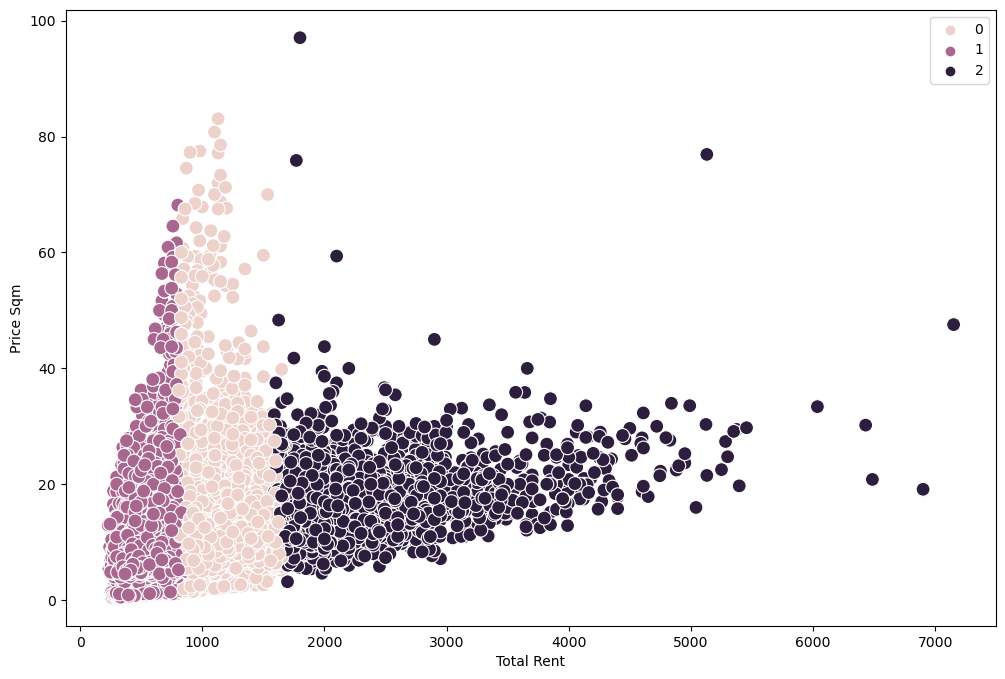

In [20]:
# Plot the clusters for the "Total Rent" and "price per squaremeter" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['totalRent'], y=df['pricepm2'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Total Rent') 
plt.ylabel('Price Sqm') 
plt.show()

#### Dark purple shows that the higher the total rent is the lower the price per sqm is. Pink sows that they have the highest price per sqm, followed by purple that sits at the middle

In [23]:
sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\Sulo\AppData\Local\Temp\ipykernel_11612\749661046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'


In [24]:
# Aggregate values for different columns from the cluster
sub.groupby('cluster').agg({'totalRent':['mean', 'median'], 
                         'noRooms':['mean', 'median'], 
                         'livingSpace':['mean', 'median'],
                          'pricepm2':['mean', 'median']})

totalRent           noRooms        livingSpace         \
                    mean  median      mean median        mean median   
cluster                                                                
dark purple  2120.945245  1950.0  3.670348    4.0  127.230251  123.0   
pink         1131.456643  1090.0  3.037865    3.0   93.222488   90.0   
purple        556.224814   540.0  2.294819    2.0   80.912209   62.0   

              pricepm2             
                  mean     median  
cluster                            
dark purple  15.201900  14.222161  
pink         10.967575  10.000000  
purple        7.095168   6.379310

#### Total rent shows me that the way it's built right now is fine because they are very close with each other mean and median, it also shows that most total rent is around 2000. I could decrease the number of rooms to maybe 7 or 8 because of the median being 4 and make furture analysis more accurate, also this shows that there are not many people who live in spaces above 6 rooms. Living space is something that I probably can reduce by half or until 300 sqm( I don't know about that one, please let me know if that is a resonable idea) but this shows that people tend to move in more apartments rather than houses, beacuse houses in general have higher sqm. The price sqm can be reduced to 60 sqm or 80 sqm because that's not needed as much and most of the time the pricepm2 is around 15-16 €